In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
plt.style.use('ggplot')

In [2]:
dataframe_train_dev = pd.read_csv('Hackstat2k19/Trainset.csv')

In [3]:
dataframe_train_dev=dataframe_train_dev.rename(columns={"Homepage _Duration":"Homepage_Duration"})
dataframe_train_dev=dataframe_train_dev.dropna(axis = 0, how ='any')

In [4]:
dataframe_train_dev.shape

(10466, 18)

In [5]:
dataframe_train_dev.head()

,Homepage,Homepage_Duration,Aboutus,Aboutus_Duration,Contactus,Contactus_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Province,TrafficType,VisitorType,Weekend,Revenue
0,1.0,10.0,0.0,0.0,9.0,700.000000,0.000000,0.011111,29.621890,0.0,Dec,2,2,9,10,Returning_Visitor,False,1
1,2.0,15.0,0.0,0.0,10.0,894.666667,0.000000,0.022222,0.000000,0.0,May,2,4,4,2,Returning_Visitor,False,0
2,1.0,85.0,0.0,0.0,14.0,306.500000,0.000000,0.004444,0.000000,0.0,Mar,2,2,3,2,Returning_Visitor,False,0
3,5.0,175.1,0.0,0.0,26.0,615.559524,0.000000,0.002083,62.773672,0.0,Sep,1,1,1,3,New_Visitor,True,1
4,2.0,25.0,0.0,0.0,5.0,40.000000,0.066667,0.083333,0.000000,0.6,May,2,2,1,1,Returning_Visitor,False,0


In [6]:
def seperate_features_targets(dataframe):
    """Prepares input features from data set.

    Args:
    dataframe: A Pandas DataFrame expected to contain data
      from data set.
    Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
    """
    #return dataframe[list(dataframe)[0:-1]].copy() , dataframe[[list(dataframe)[-1]]].copy()
    
    selected_features = dataframe[
        [
        'Homepage',
        'Homepage_Duration',
        'Aboutus',
        'Aboutus_Duration',
        'Contactus',
        'Contactus_Duration',
        'BounceRates',
        'ExitRates',
        'PageValues',
        'SpecialDay',
        #'Month',
        'OperatingSystems',
        'Browser',
        'Province',
        'TrafficType',
        #'VisitorType',
        'Weekend'#,
        #'Revenue'
        ]]

    selected_target=dataframe[["Revenue"]]

    return selected_features,selected_target

In [7]:
X,y = seperate_features_targets(dataframe_train_dev)
training_examples,validation_examples,training_targets,validation_targets = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [8]:
training_examples = training_examples.values
training_targets = training_targets.values
validation_examples = validation_examples.values
validation_targets = validation_targets.values

In [9]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,16)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(training_examples, training_targets)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(training_examples, training_targets)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(validation_examples, validation_targets) 

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
c:\users\nisal\appdata\local\programs\python\python37\lib\site-p

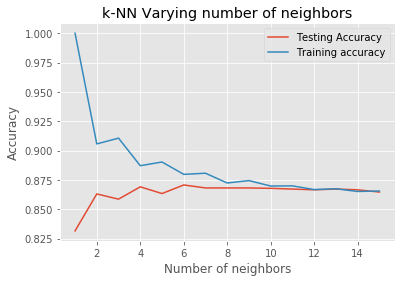

In [10]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=6)
#knn = KNeighborsClassifier(n_neighbors=4)

In [12]:
#Fit the model
knn.fit(training_examples, training_targets)

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [13]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(training_examples, training_targets)

0.8797433797433798

In [14]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(validation_examples)

In [15]:
confusion_matrix(validation_targets,y_pred)

array([[2619,   34],
       [ 372,  115]], dtype=int64)

In [16]:
print(classification_report(validation_targets,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2653
           1       0.77      0.24      0.36       487

    accuracy                           0.87      3140
   macro avg       0.82      0.61      0.64      3140
weighted avg       0.86      0.87      0.84      3140



In [17]:
y_pred_proba = knn.predict_proba(validation_examples)[:,1]

In [18]:
fpr, tpr, thresholds = roc_curve(validation_targets, y_pred_proba)

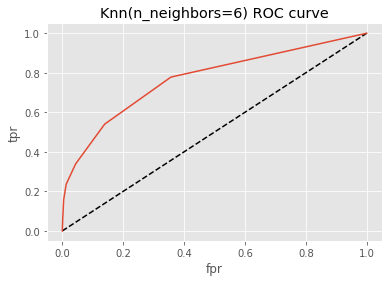

In [19]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=6) ROC curve')
plt.show()

In [20]:
#Area under ROC curve
roc_auc_score(validation_targets,y_pred_proba)

0.7681544506974012

In [21]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [22]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\nisal\appdata\local\programs\py

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
knn_cv.best_score_

0.8637492833938467

In [24]:
knn_cv.best_params_

{'n_neighbors': 6}